# 10 Minutes to pandas

This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the [Cookbook](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook) 

pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

pandas consists of the following elements

+ A set of labeled array data structures, the primary of which are Series and DataFrame
+ Index objects enabling both simple axis indexing and multi-level / hierarchical axis indexing
+ An integrated group by engine for aggregating and transforming data sets
+ Date range generation (date_range) and custom date offsets enabling the implementation of customized frequencies
+ Input/Output tools: loading tabular data from flat files (CSV, delimited, Excel 2003), and saving and loading pandas objects from the fast and efficient PyTables/HDF5 format.
+ Memory-efficient “sparse” versions of the standard data structures for storing data that is mostly missing or mostly constant (some fixed value)
+ Moving window statistics (rolling mean, rolling standard deviation, etc.)

#### Data Structures
| Dimensions        | Name           | Description  |
| :-------------: |:-------------:| :-----|
| 1      | Series | 1D labeled homogeneously-typed array |
| 2      | DataFrame  |   General 2D labeled, size-mutable tabular structure with potentially heterogeneously-typed column |


Customarily, we import as follows:

In [1]:
import pandas as pd # import module as nickname is to use short hand or nickname to represent the module, here pd refers to pandas
import numpy as np #for linear algebra
import matplotlib.pyplot as plt #for plotting
%matplotlib inline 

## Object Creation

See the [Data Structure Intro section](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro) 

### Series
**Series** is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index. The basic method to create a Series is to call:

> s = pd.Series(data, index=index)

Here, data can be many different things:
+ a Python dict
+ an ndarray
+ a scalar value (like 5)

Creating a Series by passing a list of values, letting pandas create a **default integer index**:

In [2]:
s = pd.Series([1,3,5,np.nan,6,8]) #nan means "not a number", np.nan can be regarded as a missing value

In [3]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

The first column in the output above is the "index", and the second column is the values, the last line indicates the data type.

If data is a dictionary, if index is passed the values in data corresponding to the labels in the index will be pulled out. Otherwise, an index will be constructed from the sorted keys of the dict, if possible.

In [4]:
d = {'a' : 0., 'b' : 1., 'c' : 2.}

pd.Series(d)

a    0.0
b    1.0
c    2.0
dtype: float64

In [5]:
pd.Series(d, index=['b', 'c', 'd', 'a']) #There is no key 'd' in the dictionary, so the value is missing,or NaN

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

### DataFrame
**DataFrame** is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object.  

DataFrame accepts many different kinds of input:
+ Dict of 1D ndarrays, lists, dicts, or Series
+ 2-D numpy.ndarray
+ Structured or record ndarray
+ A Series
+ Another DataFrame

Along with the data, you can optionally pass index (row labels) and columns (column labels) arguments. If you pass an index and / or columns, you are guaranteeing the index and / or columns of the resulting DataFrame. Thus, a dict of Series plus a specific index will discard all data not matching up to the passed index.

If axis labels are not passed, they will be constructed from the input data based on common sense rules.

**Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns:**

In [7]:
dates = pd.date_range('20130101', periods=6) #create a list of dates, starting from Jan. 1, 2013, for 6 days.

In [8]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [9]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
# np.random.randn(6,4) generates 6 by 4 random numbers array (6 rows and 4 columns). 
# The index are set to dates, columns are a list, which is equivalent to ['A','B','C','D'].
# If index is not specified, by default, it will be integers from 0 to number of rows minus one.

In [10]:
df

,A,B,C,D
2013-01-01,0.907936,-0.122517,-1.553779,0.609142
2013-01-02,0.651237,-0.225427,2.588120,-0.847819
2013-01-03,-0.276695,0.240938,0.161931,-0.238471
2013-01-04,0.403663,-0.781193,1.101208,0.930783
2013-01-05,-0.162495,-0.189044,0.124083,-1.728504
2013-01-06,1.284132,-0.519835,-0.763672,0.488156


**Creating a DataFrame by passing a dict of objects that can be converted to series-like.**

In [11]:
df2 = pd.DataFrame({'A':1.,
                   'B':pd.Timestamp('20130102'),
                   'C':pd.Series(1,index=list(range(4)),dtype='float32'),
                   'D':np.array([3]*4,dtype='int32'),
                   'E':pd.Categorical(["test","train","test","train"]),
                   'F':'foo'})

In [12]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


#### Check the shape of the datafram
df.shape returns two numbers, first number is the number of rows, second number is the number of columns

In [13]:
df.shape

(6, 4)

Having specific [dtypes](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-dtypes)

In [14]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:

In [15]:
# df2.<TAB>

As you can see, the columns A, B, C, and D are automatically tab completed. E is there as well; the rest of the attributes have been truncated for brevity.

## Viewing Data

See the [Basics section](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics) 

See the top & bottom rows of the frame

In [16]:
df.head() # by default, df.head() display the first 5 rows of data.

,A,B,C,D
2013-01-01,0.907936,-0.122517,-1.553779,0.609142
2013-01-02,0.651237,-0.225427,2.588120,-0.847819
2013-01-03,-0.276695,0.240938,0.161931,-0.238471
2013-01-04,0.403663,-0.781193,1.101208,0.930783
2013-01-05,-0.162495,-0.189044,0.124083,-1.728504


In [17]:
df.tail(3) # by default, df.tail() display the last 5 rows of data, but you can change how many to display.

,A,B,C,D
2013-01-04,0.403663,-0.781193,1.101208,0.930783
2013-01-05,-0.162495,-0.189044,0.124083,-1.728504
2013-01-06,1.284132,-0.519835,-0.763672,0.488156


**Display the index, columns, and the underlying numpy data**

In [18]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [19]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [20]:
df.values

array([[ 0.90793566, -0.12251688, -1.55377876,  0.60914249],
       [ 0.65123717, -0.22542743,  2.58812007, -0.84781946],
       [-0.27669517,  0.24093838,  0.16193127, -0.23847055],
       [ 0.40366264, -0.78119346,  1.10120751,  0.93078285],
       [-0.16249516, -0.18904442,  0.12408349, -1.7285041 ],
       [ 1.28413192, -0.51983529, -0.7636719 ,  0.48815563]])

#### Describe shows a quick statistic summary of your data

In [21]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.467963,-0.266180,0.276315,-0.131119
std,0.608182,0.350713,1.448583,1.013504
min,-0.276695,-0.781193,-1.553779,-1.728504
25%,-0.020956,-0.446233,-0.541733,-0.695482
50%,0.527450,-0.207236,0.143007,0.124843
75%,0.843761,-0.139149,0.866388,0.578896
max,1.284132,0.240938,2.588120,0.930783


**Transposing your data**

In [22]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,0.907936,0.651237,-0.276695,0.403663,-0.162495,1.284132
B,-0.122517,-0.225427,0.240938,-0.781193,-0.189044,-0.519835
C,-1.553779,2.588120,0.161931,1.101208,0.124083,-0.763672
D,0.609142,-0.847819,-0.238471,0.930783,-1.728504,0.488156


**Sorting by an axis**

When axis=1 it refers to row-wise, and axis=0, it refers to colomn-wise

sort_index is to sort on index or column names, **Not on value**

In [23]:
df.sort_index(axis=1, ascending=False) #by default sort is ascending

,D,C,B,A
2013-01-01,0.609142,-1.553779,-0.122517,0.907936
2013-01-02,-0.847819,2.588120,-0.225427,0.651237
2013-01-03,-0.238471,0.161931,0.240938,-0.276695
2013-01-04,0.930783,1.101208,-0.781193,0.403663
2013-01-05,-1.728504,0.124083,-0.189044,-0.162495
2013-01-06,0.488156,-0.763672,-0.519835,1.284132


In [24]:
df.sort_index(axis=0, ascending=False)

,A,B,C,D
2013-01-06,1.284132,-0.519835,-0.763672,0.488156
2013-01-05,-0.162495,-0.189044,0.124083,-1.728504
2013-01-04,0.403663,-0.781193,1.101208,0.930783
2013-01-03,-0.276695,0.240938,0.161931,-0.238471
2013-01-02,0.651237,-0.225427,2.588120,-0.847819
2013-01-01,0.907936,-0.122517,-1.553779,0.609142


**Sorting by value**

In [25]:
df.sort_values(by='B')

,A,B,C,D
2013-01-04,0.403663,-0.781193,1.101208,0.930783
2013-01-06,1.284132,-0.519835,-0.763672,0.488156
2013-01-02,0.651237,-0.225427,2.588120,-0.847819
2013-01-05,-0.162495,-0.189044,0.124083,-1.728504
2013-01-01,0.907936,-0.122517,-1.553779,0.609142
2013-01-03,-0.276695,0.240938,0.161931,-0.238471


In [26]:
df['B']=[1,3,2,1,2,3] #change the value of column B to [1,3,2,1,2,3]

In [27]:
df

,A,B,C,D
2013-01-01,0.907936,1,-1.553779,0.609142
2013-01-02,0.651237,3,2.588120,-0.847819
2013-01-03,-0.276695,2,0.161931,-0.238471
2013-01-04,0.403663,1,1.101208,0.930783
2013-01-05,-0.162495,2,0.124083,-1.728504
2013-01-06,1.284132,3,-0.763672,0.488156


In [28]:
df.sort_values(by=['B','D'],ascending=[True,False]) # sort values first by column B ascendingly then by column D descendingly.

,A,B,C,D
2013-01-04,0.403663,1,1.101208,0.930783
2013-01-01,0.907936,1,-1.553779,0.609142
2013-01-03,-0.276695,2,0.161931,-0.238471
2013-01-05,-0.162495,2,0.124083,-1.728504
2013-01-06,1.284132,3,-0.763672,0.488156
2013-01-02,0.651237,3,2.588120,-0.847819


## Selection

**Note:** While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc, .iloc and .ix.

See the indexing documentation [Indexing and Selecting Data](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing) and [MultiIndex / Advanced Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced)

### Getting

Selecting a single column, which yields a Series, equivalent to df.A

In [34]:
df['A']

2013-01-01    0.907936
2013-01-02    0.651237
2013-01-03   -0.276695
2013-01-04    0.403663
2013-01-05   -0.162495
2013-01-06    1.284132
Freq: D, Name: A, dtype: float64

Selecting more than one columns.

In [37]:
df[['A','B']]

,A,B
2013-01-01,0.907936,1
2013-01-02,0.651237,3
2013-01-03,-0.276695,2
2013-01-04,0.403663,1
2013-01-05,-0.162495,2
2013-01-06,1.284132,3


Selecting via [], which slices the rows.

In [35]:
df[0:3]

,A,B,C,D
2013-01-01,0.907936,1,-1.553779,0.609142
2013-01-02,0.651237,3,2.588120,-0.847819
2013-01-03,-0.276695,2,0.161931,-0.238471


In [38]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.651237,3,2.588120,-0.847819
2013-01-03,-0.276695,2,0.161931,-0.238471
2013-01-04,0.403663,1,1.101208,0.930783


### Selection by Label

See more in [Selection by Label](Selection by Label)

For getting a cross section using a label

`df.loc[start:end]` selects the rows based on index, between start and end, **both endpoints are included.**

In [39]:
df.loc[dates[0]]# select the row where the index is date[0], in our example, it is 2013-01-01.

A    0.907936
B    1.000000
C   -1.553779
D    0.609142
Name: 2013-01-01 00:00:00, dtype: float64

Selection by Label
`df.loc[,]` inside the [], before ',' you can specify index, after ',' you can specify columns to be selected.

In [46]:
df.loc[:,['A','B']] #select all row, but only columns 'A' and "B'.

,A,B
2013-01-01,0.907936,1
2013-01-02,0.651237,3
2013-01-03,-0.276695,2
2013-01-04,0.403663,1
2013-01-05,-0.162495,2
2013-01-06,1.284132,3


Showing label slicing, **both endpoints are included**

In [47]:
df.loc['20130102':'20130104',['A','B']] #select rows between 2013-01-02 to 2013-01-04,

,A,B
2013-01-02,0.651237,3
2013-01-03,-0.276695,2
2013-01-04,0.403663,1


For getting a scalar value

In [48]:
df.loc[dates[0],'A']

0.9079356559372572

### Selection by Position

See more in [Selection by Position](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-integer)

Select via the position of the passed integers

`df.iloc[,]` selects rows/columns based on position of rows/columns, e.g., df.iloc[3,5] selects the fouth row and 6th column of the data, remember it starts at 0.

In [52]:
df.iloc[3]

A    0.403663
B    1.000000
C    1.101208
D    0.930783
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python

**When use `df.iloc[start:end]`, end is NOT included, different from `df.loc[]`!**

In [53]:
df.iloc[3:5,0:2] #selects 4th and 5th rows, and first, second columns. 

,A,B
2013-01-04,0.403663,1
2013-01-05,-0.162495,2


By lists of integer position locations, similar to the numpy/python style

In [54]:
df.iloc[[1,2,4],[0,2]] #select 2nd, 3rd, and 5th rows, and first, third columns

,A,C
2013-01-02,0.651237,2.588120
2013-01-03,-0.276695,0.161931
2013-01-05,-0.162495,0.124083


For slicing rows explicitly

In [55]:
df.iloc[1:3,:] #select second, third rows and all columns.

,A,B,C,D
2013-01-02,0.651237,3,2.588120,-0.847819
2013-01-03,-0.276695,2,0.161931,-0.238471


For slicing columns explicitly

In [56]:
df.iloc[:,1:3]

,B,C
2013-01-01,1,-1.553779
2013-01-02,3,2.588120
2013-01-03,2,0.161931
2013-01-04,1,1.101208
2013-01-05,2,0.124083
2013-01-06,3,-0.763672


For getting a value explicitly

In [57]:
df.iloc[1,1]

3

For getting fast access to a scalar (equiv to the prior method)

In [58]:
df.iat[1,1]

3

## Boolean Indexing

Using a single column’s values to select data.

In [59]:
df[df.A > 0] #select rows where column A's value is greater than 0.

,A,B,C,D
2013-01-01,0.907936,1,-1.553779,0.609142
2013-01-02,0.651237,3,2.588120,-0.847819
2013-01-04,0.403663,1,1.101208,0.930783
2013-01-06,1.284132,3,-0.763672,0.488156


A where operation for getting.

In [60]:
df[df > 0] #select values that are greater than 0, if smaller or equal to 0, then the value becomes NaN (not a number or missing)

,A,B,C,D
2013-01-01,0.907936,1,NaN,0.609142
2013-01-02,0.651237,3,2.588120,NaN
2013-01-03,NaN,2,0.161931,NaN
2013-01-04,0.403663,1,1.101208,0.930783
2013-01-05,NaN,2,0.124083,NaN
2013-01-06,1.284132,3,NaN,0.488156


Using the isin() method for filtering:

In [61]:
df2 = df.copy()

In [62]:
df2['E'] = ['one','one', 'two','three','four','three']

In [63]:
df2

,A,B,C,D,E
2013-01-01,0.907936,1,-1.553779,0.609142,one
2013-01-02,0.651237,3,2.588120,-0.847819,one
2013-01-03,-0.276695,2,0.161931,-0.238471,two
2013-01-04,0.403663,1,1.101208,0.930783,three
2013-01-05,-0.162495,2,0.124083,-1.728504,four
2013-01-06,1.284132,3,-0.763672,0.488156,three


In [64]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,-0.276695,2,0.161931,-0.238471,two
2013-01-05,-0.162495,2,0.124083,-1.728504,four


## Setting

Setting a new column automatically aligns the data by the indexes

In [65]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102',periods=6))

In [66]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [67]:
df['F'] = s1 #Assign s1 to the F column of df

In [68]:
df

,A,B,C,D,F
2013-01-01,0.907936,1,-1.553779,0.609142,NaN
2013-01-02,0.651237,3,2.588120,-0.847819,1.0
2013-01-03,-0.276695,2,0.161931,-0.238471,2.0
2013-01-04,0.403663,1,1.101208,0.930783,3.0
2013-01-05,-0.162495,2,0.124083,-1.728504,4.0
2013-01-06,1.284132,3,-0.763672,0.488156,5.0


Setting values by label

In [69]:
df.at[dates[0],'A'] = 0

Setting values by position

In [70]:
df.iat[0,1] = 0

In [71]:
df

,A,B,C,D,F
2013-01-01,0.000000,0,-1.553779,0.609142,NaN
2013-01-02,0.651237,3,2.588120,-0.847819,1.0
2013-01-03,-0.276695,2,0.161931,-0.238471,2.0
2013-01-04,0.403663,1,1.101208,0.930783,3.0
2013-01-05,-0.162495,2,0.124083,-1.728504,4.0
2013-01-06,1.284132,3,-0.763672,0.488156,5.0


Setting by assigning with a numpy array

In [72]:
df.loc[:,'D'] = np.array([5] * len(df))

The result of the prior setting operations

In [73]:
df

,A,B,C,D,F
2013-01-01,0.000000,0,-1.553779,5,NaN
2013-01-02,0.651237,3,2.588120,5,1.0
2013-01-03,-0.276695,2,0.161931,5,2.0
2013-01-04,0.403663,1,1.101208,5,3.0
2013-01-05,-0.162495,2,0.124083,5,4.0
2013-01-06,1.284132,3,-0.763672,5,5.0


**A where operation with setting.**

In [74]:
df2 = df.copy() #make a copy of df

In [75]:
df2[df2 > 0] = -df2 #change the sign of positive values of df to negative, where the vale is greater than 0.

In [76]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0,-1.553779,-5,NaN
2013-01-02,-0.651237,-3,-2.588120,-5,-1.0
2013-01-03,-0.276695,-2,-0.161931,-5,-2.0
2013-01-04,-0.403663,-1,-1.101208,-5,-3.0
2013-01-05,-0.162495,-2,-0.124083,-5,-4.0
2013-01-06,-1.284132,-3,-0.763672,-5,-5.0


## Missing Data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the Missing Data section

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [77]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

In [78]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [79]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0,-1.553779,5,NaN,1.0
2013-01-02,0.651237,3,2.588120,5,1.0,1.0
2013-01-03,-0.276695,2,0.161931,5,2.0,NaN
2013-01-04,0.403663,1,1.101208,5,3.0,NaN


To drop any rows that have missing data.

In [80]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,0.651237,3,2.58812,5,1.0,1.0


Filling missing data

In [81]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0,-1.553779,5,5.0,1.0
2013-01-02,0.651237,3,2.588120,5,1.0,1.0
2013-01-03,-0.276695,2,0.161931,5,2.0,5.0
2013-01-04,0.403663,1,1.101208,5,3.0,5.0


To get the boolean mask where values are nan

In [82]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations

See the [Basic section on Binary Ops](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-binop)

### Stats

Operations in general exclude missing data.

**Performing a descriptive statistic**

In [83]:
df.mean() #by default, it returns the mean along columns

A    0.316640
B    1.833333
C    0.276315
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis

When you specify axis=1, it returns the mean along rows, by default axis=0 which refers to column.

In [84]:
df.mean(axis=1)

2013-01-01    0.861555
2013-01-02    2.447871
2013-01-03    1.777047
2013-01-04    2.100974
2013-01-05    2.192318
2013-01-06    2.704092
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [85]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2) #shift the value down 2 rows.

In [86]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [87]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.276695,1.0,-0.838069,4.0,1.0
2013-01-04,-2.596337,-2.0,-1.898792,2.0,0.0
2013-01-05,-5.162495,-3.0,-4.875917,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


### Apply

Applying functions to the data

In [88]:
df

,A,B,C,D,F
2013-01-01,0.000000,0,-1.553779,5,NaN
2013-01-02,0.651237,3,2.588120,5,1.0
2013-01-03,-0.276695,2,0.161931,5,2.0
2013-01-04,0.403663,1,1.101208,5,3.0
2013-01-05,-0.162495,2,0.124083,5,4.0
2013-01-06,1.284132,3,-0.763672,5,5.0


In [89]:
df.apply(np.cumsum) # apply cumulative sum or rolling sum to each column

,A,B,C,D,F
2013-01-01,0.000000,0,-1.553779,5,NaN
2013-01-02,0.651237,3,1.034341,10,1.0
2013-01-03,0.374542,5,1.196273,15,3.0
2013-01-04,0.778205,6,2.297480,20,6.0
2013-01-05,0.615709,8,2.421564,25,10.0
2013-01-06,1.899841,11,1.657892,30,15.0


## Merge

### Concat

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the [Merging section](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging)

Concatenating pandas objects together with concat():

In [90]:
df = pd.DataFrame(np.random.randn(10, 4),columns=list('ABCD'))

In [91]:
df

,A,B,C,D
0,-1.032842,0.201775,1.326715,0.937090
1,-0.641428,-0.319292,-1.108816,-0.481084
2,-0.291400,-1.547896,-0.062974,1.494303
3,-0.977754,1.787784,-0.880225,2.529095
4,0.203671,-0.854337,-0.121979,0.004917
5,-0.821354,0.288915,-0.152173,1.356295
6,-0.854381,0.120710,-1.251356,-1.126418
7,-1.764692,-0.240718,-0.073533,-0.334387
8,1.133242,-0.222516,-1.202734,-1.046592
9,-0.349882,-1.511684,0.501319,-1.518750


In [92]:
# break it into pieces
a = df[:3]
b = df[3:7]
c = df[7:]
pieces = [a,b,c]

In [93]:
df2=pd.concat(pieces)
df2

,A,B,C,D
0,-1.032842,0.201775,1.326715,0.937090
1,-0.641428,-0.319292,-1.108816,-0.481084
2,-0.291400,-1.547896,-0.062974,1.494303
3,-0.977754,1.787784,-0.880225,2.529095
4,0.203671,-0.854337,-0.121979,0.004917
5,-0.821354,0.288915,-0.152173,1.356295
6,-0.854381,0.120710,-1.251356,-1.126418
7,-1.764692,-0.240718,-0.073533,-0.334387
8,1.133242,-0.222516,-1.202734,-1.046592
9,-0.349882,-1.511684,0.501319,-1.518750


### Join

SQL style merges. See the [Database style joining](http://pandas.pydata.org/pandas-docs/stable/merging.html#merging-join)

In [94]:
left = pd.DataFrame({'key': ['foo', 'foo','boo','boo','coo'], 'lval': [1, 2,3,4,5]})

In [95]:
right = pd.DataFrame({'key': ['foo', 'boo','doo'], 'rval': [6,7,8]})

In [96]:
left

,key,lval
0,foo,1
1,foo,2
2,boo,3
3,boo,4
4,coo,5


In [97]:
right

,key,rval
0,foo,6
1,boo,7
2,doo,8


In [98]:
pd.merge(left, right, on='key',how='left')

,key,lval,rval
0,foo,1,6.0
1,foo,2,6.0
2,boo,3,7.0
3,boo,4,7.0
4,coo,5,NaN


In [99]:
pd.merge(left, right, on='key',how='right')

,key,lval,rval
0,foo,1.0,6
1,foo,2.0,6
2,boo,3.0,7
3,boo,4.0,7
4,doo,NaN,8


In [100]:
pd.merge(left, right, on='key',how='outer')

,key,lval,rval
0,foo,1.0,6.0
1,foo,2.0,6.0
2,boo,3.0,7.0
3,boo,4.0,7.0
4,coo,5.0,NaN
5,doo,NaN,8.0


In [101]:
pd.merge(left, right, on='key',how='inner')

,key,lval,rval
0,foo,1,6
1,foo,2,6
2,boo,3,7
3,boo,4,7


## Plotting
[Plotting](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization) docs.

In [102]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [103]:
ts = ts.cumsum()

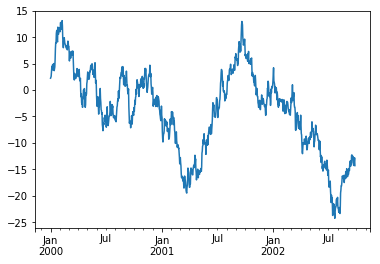

In [104]:
ts.plot()

On DataFrame, plot() is a convenience to plot all of the columns with labels:

In [105]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])

In [106]:
df = df.cumsum()

<Figure size 432x288 with 0 Axes>

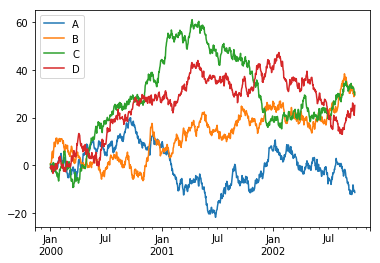

In [107]:
plt.figure(); df.plot(); plt.legend(loc='best')

## Getting Data In/Out

### CSV
[Writing to a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-store-in-csv)

In [108]:
df.to_csv('foo.csv',index=False)

In [109]:
df

,A,B,C,D
2000-01-01,-1.207826,0.487519,0.434231,-1.038355
2000-01-02,-0.536955,0.833874,-1.116938,-0.899863
2000-01-03,0.349789,0.929620,-1.495501,-1.684342
2000-01-04,-0.806949,1.248057,-0.741148,-0.120837
2000-01-05,-1.852329,2.292696,-2.264131,-0.619205
2000-01-06,-1.292691,4.623331,-2.834600,-0.237234
2000-01-07,0.384531,5.406718,-1.710399,-1.226784
2000-01-08,-0.841059,5.824120,-1.801215,-2.245401
2000-01-09,-0.837966,3.026029,0.340976,-3.486138
2000-01-10,0.883985,3.268889,-0.298830,-3.362193


[Reading from a csv file](http://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table)

In [110]:
pd.read_csv('foo.csv')

,A,B,C,D
0,-1.207826,0.487519,0.434231,-1.038355
1,-0.536955,0.833874,-1.116938,-0.899863
2,0.349789,0.929620,-1.495501,-1.684342
3,-0.806949,1.248057,-0.741148,-0.120837
4,-1.852329,2.292696,-2.264131,-0.619205
5,-1.292691,4.623331,-2.834600,-0.237234
6,0.384531,5.406718,-1.710399,-1.226784
7,-0.841059,5.824120,-1.801215,-2.245401
8,-0.837966,3.026029,0.340976,-3.486138
9,0.883985,3.268889,-0.298830,-3.362193
